<a href="https://colab.research.google.com/github/aks3743/yolov10/blob/main/tennis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

https://drive.google.com/file/d/19cAuRgPL6EyXWVzeHZIBkdXsFzwjDaxg/view?usp=sharing

In [2]:
!gdown "https://drive.google.com/uc?id=19cAuRgPL6EyXWVzeHZIBkdXsFzwjDaxg&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=19cAuRgPL6EyXWVzeHZIBkdXsFzwjDaxg&confirm=t
To: /content/Tennis_Shot_Identification_aks.zip
100% 212M/212M [00:02<00:00, 80.5MB/s]


In [3]:
!unzip -q /content/Tennis_Shot_Identification_aks.zip -d /content/Tennis_Shot_Identification

In [4]:
!sudo apt-get clean

In [5]:
!apt-get install -q -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 7,813 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archive.ubuntu.com/ub

In [6]:
!python -m pip install pillow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.8 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


In [7]:
%cd /content/Tennis_Shot_Identification/

/content/Tennis_Shot_Identification


In [8]:
!pwd

/content/Tennis_Shot_Identification


In [9]:
!pip install -q tensorflow==2.14.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorstore 0.1.64 requires ml-dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.14.1 which is incompatible.


In [10]:
!python tennis_shot_identification_and_counts.py --source="Video1.mp4" --device='0'

2024-08-26 15:58:42.408827: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-26 15:58:42.457225: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-26 15:58:42.457287: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-26 15:58:42.457352: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-26 15:58:42.468075: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: A

In [13]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/Tennis_Shot_Identification/Video1_wed.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
https://drive.google.com/file/d/1WpeO0KQ405VAl1tsqFJuu3mnjqadtHzj/view?usp=sharing

In [16]:
!gdown "https://drive.google.com/uc?id=1112fJ22Sp_8iduvtMHZhYVXOW4y3K1pt&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1112fJ22Sp_8iduvtMHZhYVXOW4y3K1pt&confirm=t
To: /content/Tennis_Shot_Identification/keypointsfinder.py
100% 7.88k/7.88k [00:00<00:00, 33.4MB/s]


In [15]:
https://drive.google.com/file/d/1112fJ22Sp_8iduvtMHZhYVXOW4y3K1pt/view?usp=sharing

'/content/Tennis_Shot_Identification'

In [17]:
!python keypointsfinder.py --source="Video1.mp4" --device='0'

2024-08-26 16:12:29.014210: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-26 16:12:29.058558: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-26 16:12:29.058612: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-26 16:12:29.058662: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-26 16:12:29.067740: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: A

UsageError: Line magic function `%md` not found.


pose  model

In [2]:
# Install the ultralytics package from PyPI
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.0/872.0 kB 5.9 MB/s eta 0:00:00


In [12]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n-pose.pt")  # load an official model
# model = YOLO("path/to/best.pt")  # load a custom model

# Predict with the model
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 7.5ms
Speed: 3.2ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


In [5]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[119, 146, 172],
         [121, 148, 174],
         [122, 152, 177],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        [[120, 147, 173],
         [122, 149, 175],
         [123, 153, 178],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        [[123, 150, 176],
         [124, 151, 177],
         [125, 155, 180],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        ...,
 
        [[183, 182, 186],
         [179, 178, 182],
         [180, 179, 183],
         ...,
         [121, 111, 117],
         [113, 103, 109],
         [115, 105, 111]],
 
        [[165, 164, 168],
         [173, 172, 176],
         [187, 186,

In [14]:
# Predict with the model
results = model("/content/tennis play man.jpg")  # predict on an image


image 1/1 /content/tennis play man.jpg: 448x640 1 person, 10.3ms
Speed: 3.7ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


In [5]:
import cv2

In [7]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[  4,  11,   8],
         [  0,   7,   4],
         [  3,  10,   7],
         ...,
         [ 67,  75,  35],
         [ 60,  66,  31],
         [ 55,  60,  29]],
 
        [[  9,  16,  13],
         [  7,  14,  11],
         [ 12,  19,  16],
         ...,
         [ 69,  77,  36],
         [ 63,  69,  34],
         [ 55,  60,  29]],
 
        [[  3,  12,   9],
         [  4,  13,  10],
         [ 12,  21,  18],
         ...,
         [ 68,  78,  35],
         [ 65,  73,  36],
         [ 56,  63,  30]],
 
        ...,
 
        [[158, 149, 146],
         [158, 149, 146],
         [158, 149, 146],
         ...,
         [139, 134, 131],
         [139, 134, 131],
         [138, 133, 130]],
 
        [[157, 148, 145],
         [157, 148, 145],
         [157, 148,

In [10]:
 from google.colab.patches import cv2_imshow

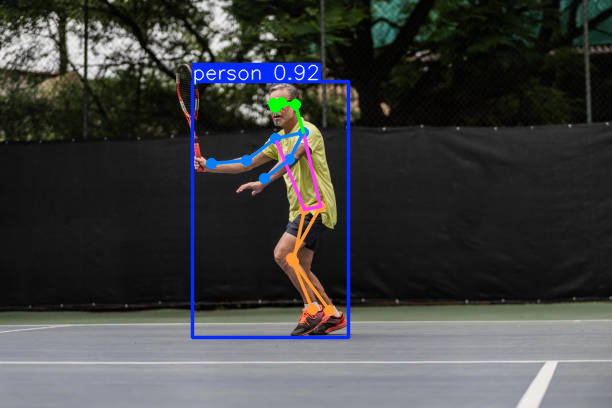

In [15]:
result = results[0]

# Get the keypoint predictions
keypoints = result.keypoints  # this contains the keypoints predictions

# Visualize the results
annotated_image = result.plot()  # Plot the keypoints on the image

# Display the annotated image with keypoints
cv2_imshow(annotated_image)

In [16]:
result0 = results[0]

In [17]:
result0

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'person'}
obb: None
orig_img: array([[[  4,  11,   8],
        [  0,   7,   4],
        [  3,  10,   7],
        ...,
        [ 67,  75,  35],
        [ 60,  66,  31],
        [ 55,  60,  29]],

       [[  9,  16,  13],
        [  7,  14,  11],
        [ 12,  19,  16],
        ...,
        [ 69,  77,  36],
        [ 63,  69,  34],
        [ 55,  60,  29]],

       [[  3,  12,   9],
        [  4,  13,  10],
        [ 12,  21,  18],
        ...,
        [ 68,  78,  35],
        [ 65,  73,  36],
        [ 56,  63,  30]],

       ...,

       [[158, 149, 146],
        [158, 149, 146],
        [158, 149, 146],
        ...,
        [139, 134, 131],
        [139, 134, 131],
        [138, 133, 130]],

       [[157, 148, 145],
        [157, 148, 145],
        [157, 148, 145],
        ...,
        [139, 136, 132],

array([[[  4,  11,   8],
        [  0,   7,   4],
        [  3,  10,   7],
        ...,
        [ 67,  75,  35],
        [ 60,  66,  31],
        [ 55,  60,  29]],

       [[  9,  16,  13],
        [  7,  14,  11],
        [ 12,  19,  16],
        ...,
        [ 69,  77,  36],
        [ 63,  69,  34],
        [ 55,  60,  29]],

       [[  3,  12,   9],
        [  4,  13,  10],
        [ 12,  21,  18],
        ...,
        [ 68,  78,  35],
        [ 65,  73,  36],
        [ 56,  63,  30]],

       ...,

       [[158, 149, 146],
        [158, 149, 146],
        [158, 149, 146],
        ...,
        [139, 134, 131],
        [139, 134, 131],
        [138, 133, 130]],

       [[157, 148, 145],
        [157, 148, 145],
        [157, 148, 145],
        ...,
        [139, 136, 132],
        [139, 136, 132],
        [138, 135, 131]],

       [[156, 147, 144],
        [156, 147, 144],
        [156, 147, 144],
        ...,
        [139, 136, 132],
        [139, 136, 132],
        [138, 135, 131]]], dtype=uint8)
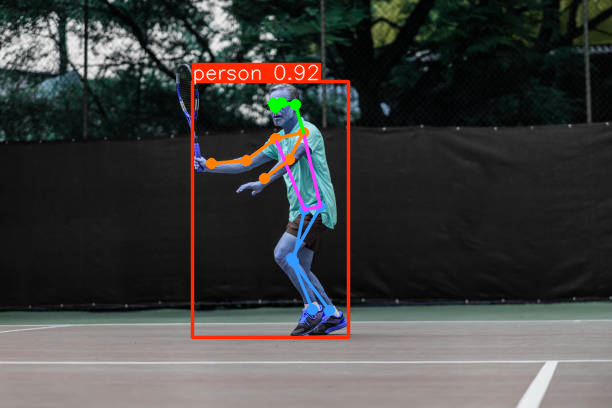

In [18]:
annotated_image  # Plot the keypoints on the image
